**k-means Clustering**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%pip install folium
import folium
from folium import plugins
from folium.plugins import HeatMap

Note: you may need to restart the kernel to use updated packages.


In [2]:
original_data = pd.read_csv('processed_dataframe.csv')

In [3]:
#City centre for distance calculation
chicago_centre = [41.881832, -87.623177]
chicago_centre_rad = [radians(_) for _ in chicago_centre]

In [4]:
#Distance between each Station and City centre
original_data["start_dist_centre"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in chicago_centre], [radians(_) for _ in [x.start_lat,x.start_lng]]]))[0][1] * 6371000/1000, axis = 1)
original_data["end_dist_centre"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in chicago_centre], [radians(_) for _ in [x.end_lat,x.end_lng]]]))[0][1] * 6371000/1000, axis = 1)

In [5]:
#Distance between stations / netdistance (in km)
original_data["distance"] = original_data.apply(lambda x: (haversine_distances([[radians(_) for _ in [x.end_lat,x.end_lng]], [radians(_) for _ in [x.start_lat,x.start_lng]]]))[0][1] * 6371000/1000, axis = 1)

In [6]:
data = original_data[[
    "avg_temp",
    "hour",
    "month",
    #"start_dist_centre",
    #"end_dist_centre",
    #"bike_id",
    "distance",
    "trip_duration_min"]].copy()

In [7]:
data['avg_temp']=data['avg_temp'].astype(float)
data['hour']=data['hour'].astype(float)
data['month']=data['month'].astype(float)
#data['start_station_id']=data['start_station_id'].astype(float)
#data['end_station_id']=data['end_station_id'].astype(float)
# data['bike_id']=data['bike_id'].astype(float)
data['trip_duration_min']=data['trip_duration_min'].astype(float)
data['distance']=data['distance'].astype(float)

In [8]:
# data.sort_values(by = "start_station_id", inplace=True)
data.head()

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0


In [9]:
data["distance"] = data["distance"].fillna(0)

In [10]:
data

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0
...,...,...,...,...,...
3817999,-2.8,23.0,12.0,4.025265,20.0
3818000,-2.8,23.0,12.0,0.000000,26.0
3818001,-2.8,23.0,12.0,1.467796,9.0
3818002,-2.8,23.0,12.0,1.467796,9.0


In [11]:
data["distance"] = data["distance"].fillna(0)
data = data[np.isfinite(data).all(1)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 3818003
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   avg_temp           float64
 1   hour               float64
 2   month              float64
 3   distance           float64
 4   trip_duration_min  float64
dtypes: float64(5)
memory usage: 174.8 MB


In [12]:
data.head()

,avg_temp,hour,month,distance,trip_duration_min
0,2.5,0.0,1.0,1.787966,6.0
1,2.5,0.0,1.0,0.942257,7.0
2,2.5,0.0,1.0,2.717795,14.0
3,2.5,0.0,1.0,5.876562,30.0
4,2.5,0.0,1.0,0.951965,6.0


**Data Prep and Scaling** 

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
sample = data.sample(n=5000)
data_scaled = scaler.transform(sample)
data_scaled_df = pd.DataFrame(sample, columns=data.columns, index=sample.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df.head()

,avg_temp,hour,month,distance,trip_duration_min
1647298,22.8,8.0,7.0,3.366480,18.0
968791,18.3,14.0,5.0,3.320502,26.0
3041816,20.0,16.0,9.0,2.939178,38.0
102956,-28.9,8.0,1.0,2.615003,16.0
1068041,25.6,17.0,6.0,0.577617,3.0


In [14]:
z_scaled = data_scaled_df
three_scaled = data_scaled_df
four_scaled = data_scaled_df
five_scaled = data_scaled_df
z_scaled

,avg_temp,hour,month,distance,trip_duration_min
1647298,22.8,8.0,7.0,3.366480,18.0
968791,18.3,14.0,5.0,3.320502,26.0
3041816,20.0,16.0,9.0,2.939178,38.0
102956,-28.9,8.0,1.0,2.615003,16.0
1068041,25.6,17.0,6.0,0.577617,3.0
...,...,...,...,...,...
2592026,17.2,13.0,8.0,0.523296,3.0
1460820,22.8,8.0,6.0,0.620437,4.0
3455318,12.2,18.0,10.0,0.718568,3.0
164342,-2.2,17.0,2.0,8.546469,40.0


**--------**

In [15]:
k_max = 100 # since the k=100 clustering will return 100 single-element clusters 

In [16]:
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(data_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

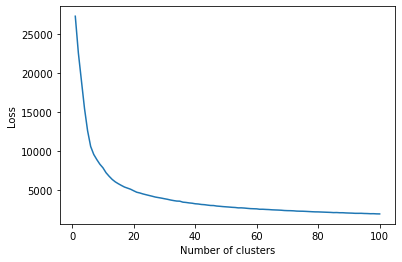

In [17]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

This loss function's "elbow" (as mentioned rule of thumb during the lecture) number of clusters could be determined between 7-14. 
For ease of interpretation we will investigate the result of ascending no. of clusters. 

In [18]:
# refit algorithm
k_means = KMeans(n_clusters=2)
k_means.fit(data_scaled)

k_3 = KMeans(n_clusters=3)
k_3.fit(data_scaled)

k_4 = KMeans(n_clusters=4)
k_4.fit(data_scaled)

k_5 = KMeans(n_clusters=6)
k_5.fit(data_scaled)


# match records to clusters by calling predict
k_means.predict(data_scaled)
k_3.predict(data_scaled)
k_4.predict(data_scaled)
k_5.predict(data_scaled)


array([1, 3, 3, ..., 5, 0, 3])

In [19]:
numbers = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
z_scaled["clusters"] = k_means.predict(data_scaled)
#three_scaled["clusters"] = k_3.predict(data_scaled)
#four_scaled["clusters"] = k_4.predict(data_scaled)
#five_scaled["clusters"] = k_5.predict(data_scaled)

**k=2 cluster interpretation**

one could interpret the clusters as 1) commuters (blue) and 2) non-commuters (orange). This gets especially clear when inspecting the densities: 
1) month: commuters flat distribution in comparison to non-commuters which peaks around summer and almost completely flattens during winter season. 
2) hour: commuters have density peaks at 7-8am vs non-commuters/leisure users in the evening hours around 7pm

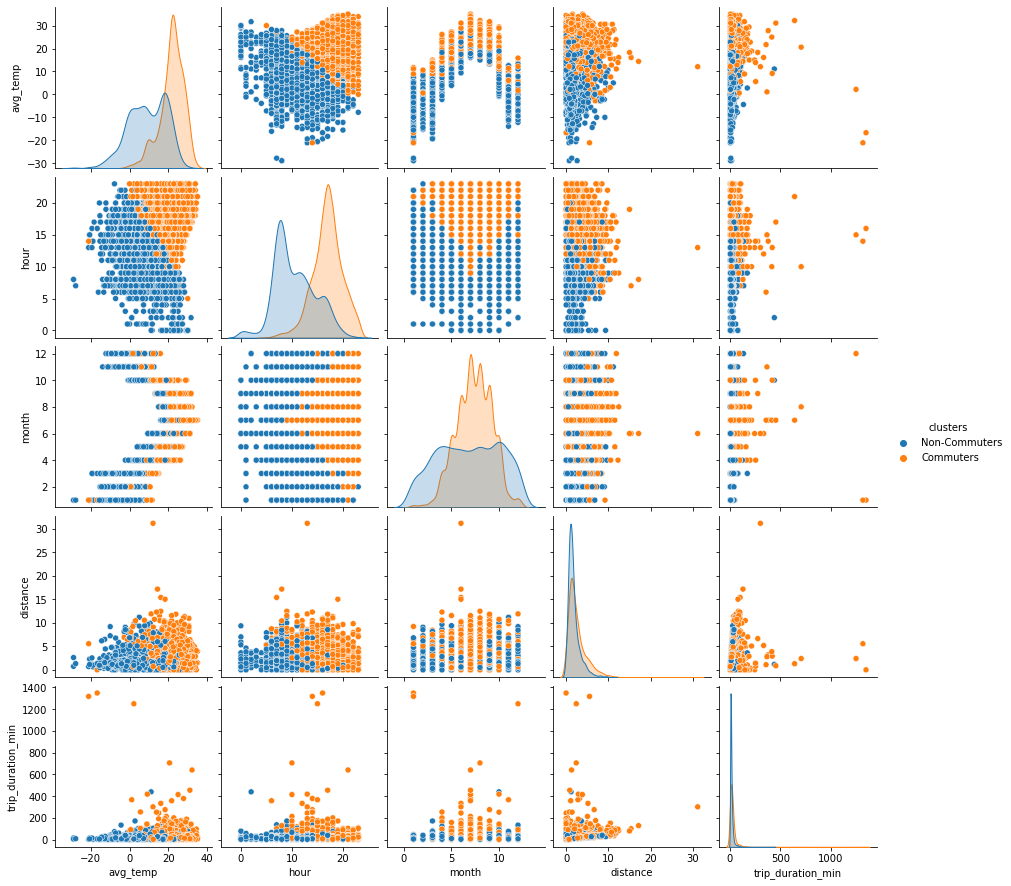

In [20]:
numberss = ["Commuters", "Non-Commuters"]
z_scaled["clusters"] = z_scaled["clusters"].apply(lambda x: numberss[x])
sns.pairplot(data=z_scaled, hue="clusters")

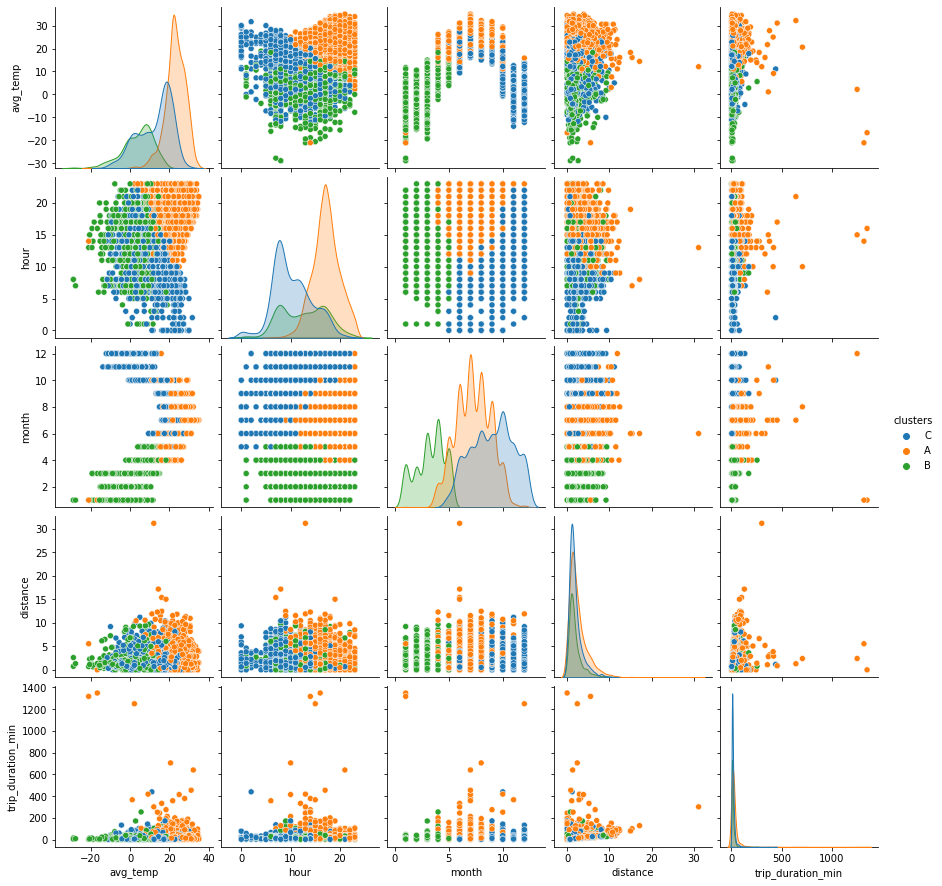

In [21]:
three_scaled["clusters"] = k_3.predict(data_scaled)
three_scaled["clusters"] = three_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=three_scaled, hue="clusters")

**k=4 cluster interpretation**

The results of the clustering algorithm for the trip characteristics can be interpreted as: 
1) Commuters (Both *Red* ^= fall to winter and *Orange* ^= spring to summer) ---> Peak hours at 7am and 6pm, relatively flat/constant over the whole year

2) Non-Commuters/Leisure (Short-Mid Distance) --> Peak usage at june/july around noon time (7pm, almost no rides <10am). Almost vanishes towards start/end of the year. Peak density at a trip distance of 6km (in comparison to peak density distance of 1km for the short-mid trips) 

3) Non-Commuters/Leisure (Long-Distance) --> Peak month at june/july (but significantly less than "short to mid"-trips). Almost vanishes towards start/end of the year. Trip count/densities almost vanish towards start/end of the year. Slow buildup of trip count throughout the day up to peak at 7pm. 


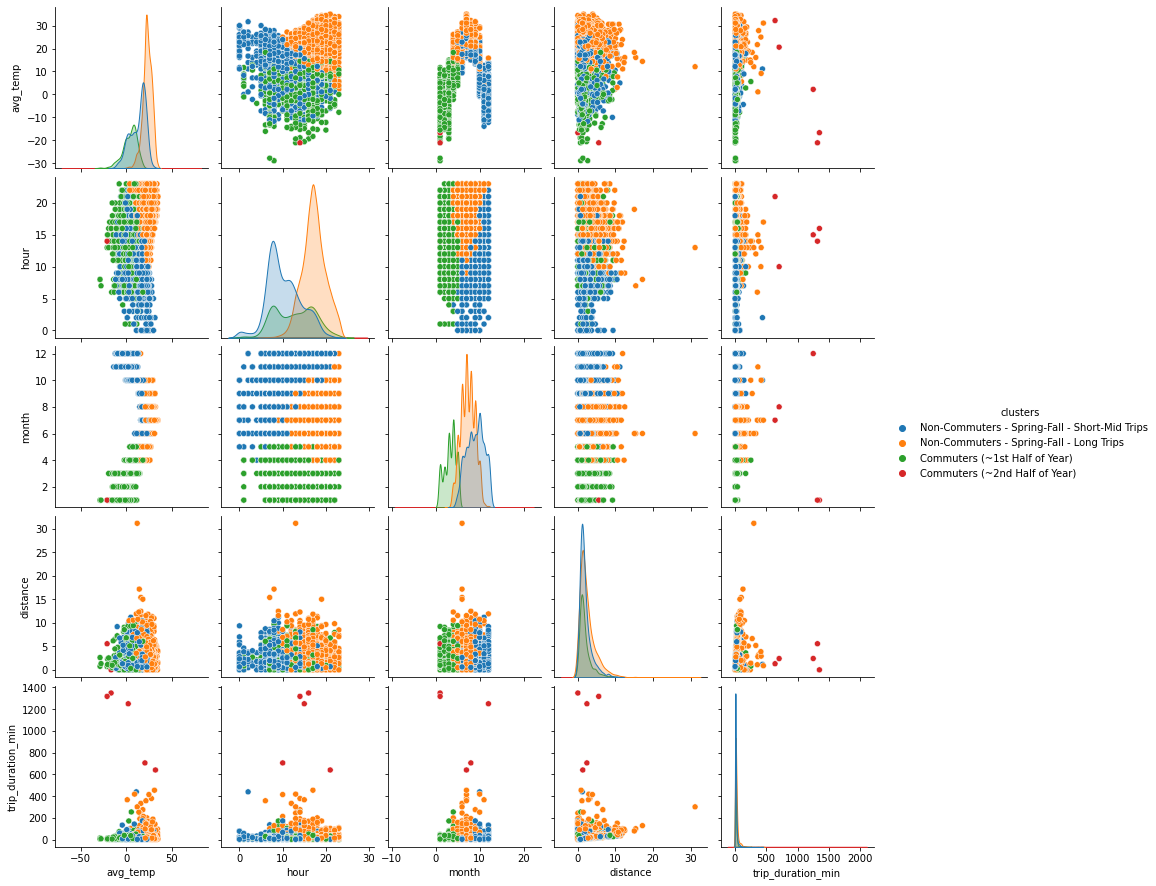

In [22]:
numbers_z = [ "Commuters (~1st Half of Year)", "Non-Commuters - Spring-Fall - Short-Mid Trips", "Non-Commuters - Spring-Fall - Long Trips","Commuters (~2nd Half of Year)"]
four_scaled["clusters"] = k_4.predict(data_scaled)
four_scaled["clusters"] = four_scaled["clusters"].apply(lambda x: numbers_z[x])
sns.pairplot(data=four_scaled, hue="clusters")

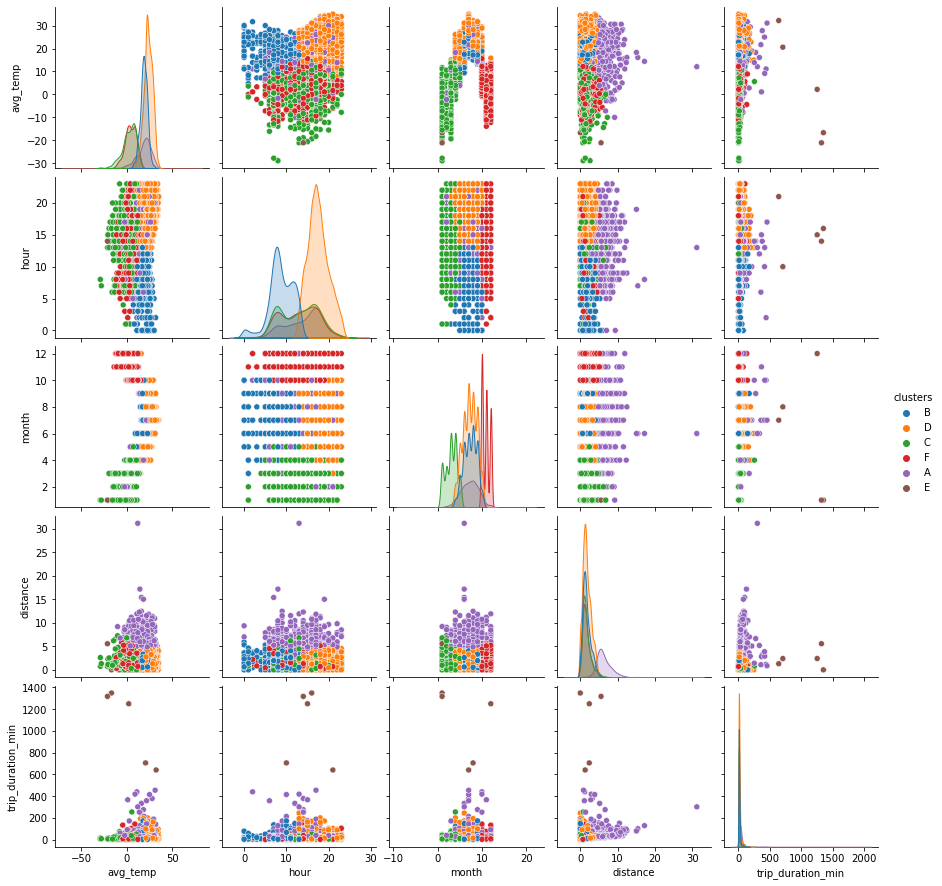

In [23]:
five_scaled["clusters"] = k_5.predict(data_scaled)
five_scaled["clusters"] = five_scaled["clusters"].apply(lambda x: numbers[x])
sns.pairplot(data=five_scaled, hue="clusters")

***Hierarchical Clustering***

In [24]:
#hierarch_sample = data.sample(n=200)
#hierarch_data_scaled = scaler.transform(hierarch_sample)

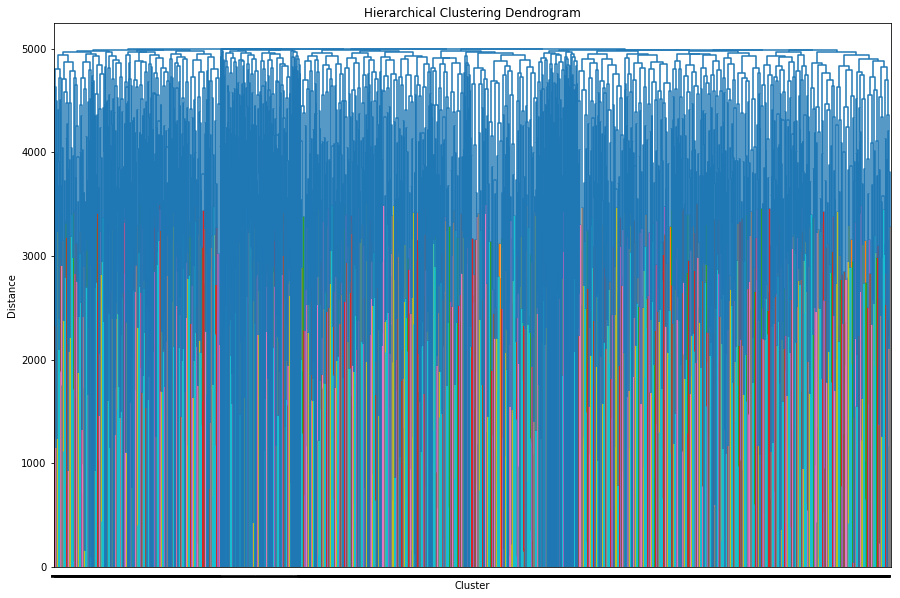

In [25]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


agglo = AgglomerativeClustering(n_clusters=4) #The number of clusters to find
y_pred_agglo = agglo.fit_predict(data_scaled)

plt.figure(figsize=(15,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, labels=agglo.labels_)
plt.ylabel("Distance")
plt.xlabel("Cluster")
plt.show()

In [26]:
z_scaled["Agglo"] = y_pred_agglo
z_scaled

,avg_temp,hour,month,distance,trip_duration_min,clusters,Agglo
1647298,22.8,8.0,7.0,3.366480,18.0,B,0
968791,18.3,14.0,5.0,3.320502,26.0,D,0
3041816,20.0,16.0,9.0,2.939178,38.0,D,0
102956,-28.9,8.0,1.0,2.615003,16.0,C,3
1068041,25.6,17.0,6.0,0.577617,3.0,D,0
...,...,...,...,...,...,...,...
2592026,17.2,13.0,8.0,0.523296,3.0,B,0
1460820,22.8,8.0,6.0,0.620437,4.0,B,0
3455318,12.2,18.0,10.0,0.718568,3.0,F,0
164342,-2.2,17.0,2.0,8.546469,40.0,A,3


**For comparison:** Pairplots (same visualization used for k-means).

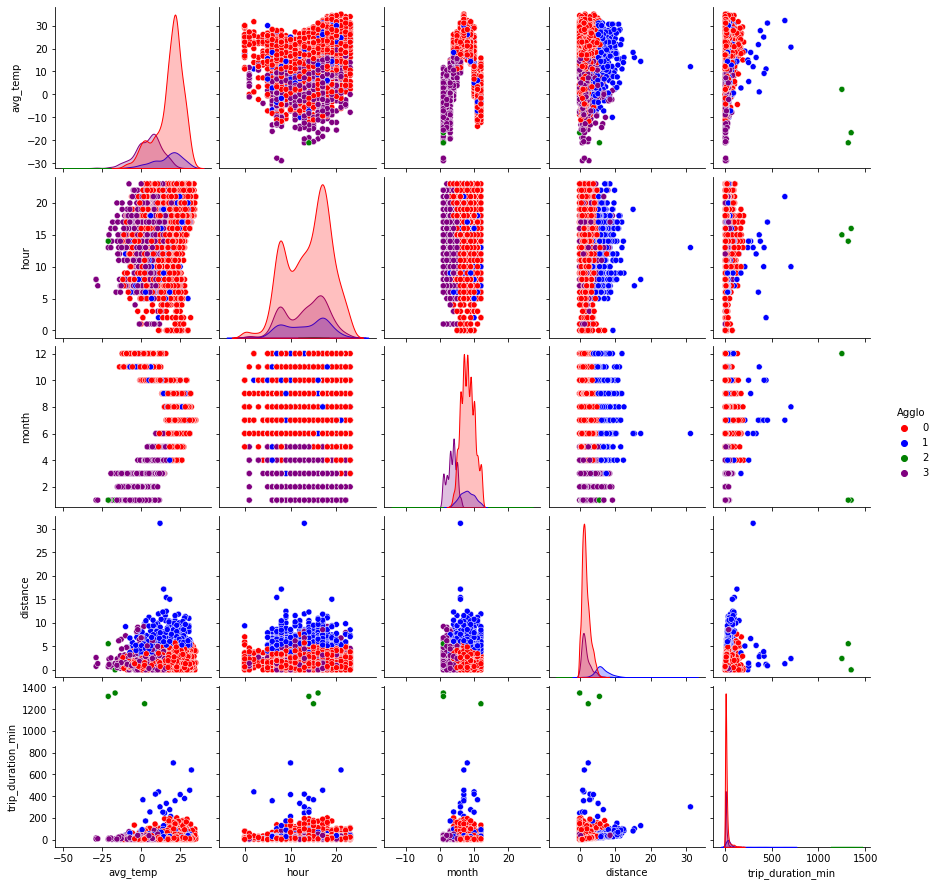

In [27]:
sns.pairplot(data=z_scaled, hue="Agglo", palette=["red", "blue", "green", "purple"])

Hierarchical clustering yields similar implications for segmentation of the trip types as with k-means clustering.

**PRINCIPAL COMPONENT ANALYSIS**

In [28]:
data2 = original_data[[
    "avg_temp",
    "hour",
    "month",
    "start_dist_centre",
    "end_dist_centre",
    #"bike_id",
    "distance",
    "trip_duration_min"
    ]].copy()

data2['avg_temp']=data2['avg_temp'].astype(float)
data2['hour']=data2['hour'].astype(float)
data2['month']=data2['month'].astype(float)
data2['start_dist_centre']=data2['start_dist_centre'].astype(float)
data2['end_dist_centre']=data2['end_dist_centre'].astype(float)
#data['bike_id']=data['bike_id'].astype(float)
data2['trip_duration_min']=data2['trip_duration_min'].astype(float)
data2['distance']=data2['distance'].astype(float)

#######
data2["distance"] = data2["distance"].fillna(0)
data2 = data2[np.isfinite(data2).all(1)]

##
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data2)
sample2 = data2.sample(n=1000)
data_scaled2 = scaler.transform(data2)
data_scaled_df2 = pd.DataFrame(data2, columns=data2.columns, index=data2.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df2.head()

,avg_temp,hour,month,start_dist_centre,end_dist_centre,distance,trip_duration_min
0,2.5,0.0,1.0,1.116084,2.353592,1.787966,6.0
1,2.5,0.0,1.0,0.491839,0.791856,0.942257,7.0
2,2.5,0.0,1.0,3.810309,5.421507,2.717795,14.0
3,2.5,0.0,1.0,7.627652,2.447924,5.876562,30.0
4,2.5,0.0,1.0,1.679940,1.486920,0.951965,6.0


In [29]:
from sklearn.decomposition import PCA
# Create the PCA object
pca = PCA(n_components=5)

# Fit the PCA object to the data
pca.fit(data_scaled2)

# Transform the data using the PCA object
X_pca = pca.transform(data_scaled2)

In [30]:
print(pca.components_)
print(list(data_scaled_df2.columns)[:])

[[ 0.14681506  0.14867792  0.04356125  0.65621291  0.67874941  0.23176701
   0.0970079 ]
 [ 0.62281654  0.47425737  0.25645556 -0.25638804 -0.16330208  0.30173538
   0.37143425]
 [-0.27764366 -0.41486846 -0.20678161 -0.04022616 -0.0795607   0.57228888
   0.61039078]
 [-0.02478988  0.47159739 -0.87837842 -0.06009065  0.01961728 -0.02197375
   0.03088924]
 [-0.11282036  0.07350674  0.07968107  0.08792877  0.05717055 -0.69675009
   0.69214061]]
['avg_temp', 'hour', 'month', 'start_dist_centre', 'end_dist_centre', 'distance', 'trip_duration_min']


In [31]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.26085448 0.19088197 0.16112864 0.14413188 0.11250225]
0.8694992233915828


In [32]:
X_pca_df = pd.DataFrame(X_pca, columns = ["First PC", "Second PC", "Third PC", "Fourth PC", "Fifth PC"])


In [33]:
X_pca_df

,First PC,Second PC,Third PC,Fourth PC,Fifth PC
0,-1.686157,-2.730420,1.820214,0.758571,-0.449993
1,-2.219559,-2.737062,1.618393,0.771459,-0.155982
2,-0.422145,-2.850782,2.131376,0.724056,-0.535156
3,0.158472,-2.326754,3.385623,0.615066,-1.387088
4,-1.854209,-2.867688,1.575338,0.753581,-0.135361
...,...,...,...,...,...
3817633,0.126337,0.645549,-0.084227,-0.673344,-0.217214
3817634,-1.663638,0.418524,-1.102128,-0.611907,1.276571
3817635,-1.282696,0.410176,-0.936819,-0.656601,0.447120
3817636,-1.282696,0.410176,-0.936819,-0.656601,0.447120


In [34]:
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
scaler3.fit(X_pca_df)
sample33 = X_pca_df.sample(n=1000)
data_scaled33 = scaler3.transform(sample33)
data_scaled_df33 = pd.DataFrame(sample33, columns=X_pca_df.columns, index=sample33.index)
# data_scaled_df.sort_values(by = "start_station_id", inplace = True)
data_scaled_df33.head()

,First PC,Second PC,Third PC,Fourth PC,Fifth PC
212437,-1.790506,-2.278877,1.264327,1.199932,-0.111814
1457183,-0.300128,2.333895,0.277848,1.071005,1.750006
768992,-0.677035,0.308452,-0.477601,1.035118,0.030971
1297123,-1.007717,-0.729006,0.913268,-0.296614,-0.500220
1803668,-0.320369,2.223080,-0.518316,0.708286,1.402830


In [35]:
data_scaled33.shape

(1000, 5)

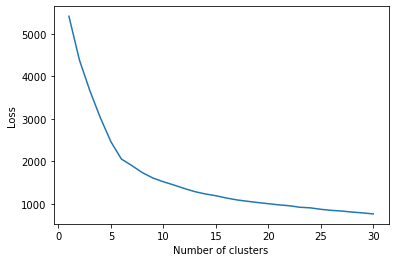

In [36]:
pca_clusters = []
pca_losses = []

for i in range(30):
    model = KMeans(n_clusters=i+1)
    model.fit(data_scaled33)
    pca_clusters.append(i+1)
    pca_losses.append(model.inertia_)
    
plt.plot(pca_clusters, pca_losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

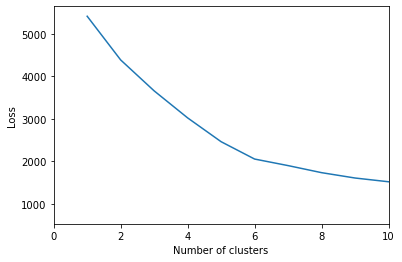

In [37]:
plt.plot(pca_clusters, pca_losses)
plt.xlim([0,10])
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

In [38]:
# elbow = 6 

In [39]:
pca_three_means = KMeans(n_clusters=6)

In [40]:
pca_three_means.fit(X_pca_df)


KMeans(n_clusters=6)

In [41]:
X_pca_df["Cluster"] = pca_three_means.predict(X_pca_df)
#sns.lmplot(x="First PC", y="Second PC", hue="Cluster", data=X_pca_df, fit_reg=False)
#sns.lmplot(x="First PC", y="Second PC", hue="Species", data=X_pca_df, fit_reg=False)

In [42]:
X_pca_df

,First PC,Second PC,Third PC,Fourth PC,Fifth PC,Cluster
0,-1.686157,-2.730420,1.820214,0.758571,-0.449993,3
1,-2.219559,-2.737062,1.618393,0.771459,-0.155982,3
2,-0.422145,-2.850782,2.131376,0.724056,-0.535156,3
3,0.158472,-2.326754,3.385623,0.615066,-1.387088,3
4,-1.854209,-2.867688,1.575338,0.753581,-0.135361,3
...,...,...,...,...,...,...
3817633,0.126337,0.645549,-0.084227,-0.673344,-0.217214,1
3817634,-1.663638,0.418524,-1.102128,-0.611907,1.276571,4
3817635,-1.282696,0.410176,-0.936819,-0.656601,0.447120,4
3817636,-1.282696,0.410176,-0.936819,-0.656601,0.447120,4


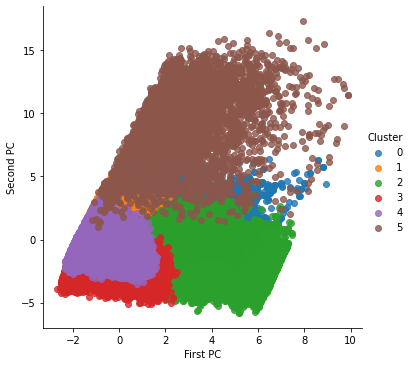

In [43]:
sns.lmplot(x="First PC", y="Second PC", hue="Cluster", data=X_pca_df, fit_reg=False)